## Text Analytics -- Case Study: Silence of the Lambs Novel

### Highly Recommended: The graphs/plots in the notebook can be viewed using this link: [nbviewer](https://nbviewer.jupyter.org), because the plotly graphs cannot be viewed in github. 

***(you will need to copy and paste the url of this notebook to the nbviewer link)***

- The aim of this text analytics project is to analyse a storybook or novel through extracting out the characters, their dialogue, words/verbs used them and also to check the locations and time occurences mentioned in the novel.

**Objectives:**

- Extract out the major characters, time occurences and geopolitical locations mentioned in the Novel.
- Extract out the interaction between the top characters if any, i.e. check if two characters appear in the same sentences
- Check the Gender distribution based on the characters in the Novel
- Extract out sentences where characters are the "Subject" and the corresponding "action verbs" used by them



### Steps Ahead:
- Convert PDF Book(.pdf) to Text Format (.txt) 
- Data Cleaning with Regex (Regular Expression)
- Entity Extraction with Spacy
- Data Visualization with Plotly:
    - Character, Geopolitical and Time occurence Visualizations
    - Gender Distribution charts
    - Character's Appearances Visualizations
- Dependency parsing -- to extract sentences where characters are the "Subject" of Sentences
- Character's action visualization


- Tools utilized: ***Spacy, NLTK, Ploty, Seaborn, Regex***

### ***Note: All the codes for this analysis are in modules: pdf_to_txt.py, txt_extract.py, gender.py, text_plots.py, subj.py***

In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')
from spacy import displacy

# plotly
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

### - Convert PDF to Txt.format

In [11]:
# from pdf_to_txt import pdf_to_text

In [2]:
# pdfDir = r"C:\Users\Adeboye Adeniyi\Documents\filmscripts\pdfscripts/"
# txtDir = r'C:\Users\Adeboye Adeniyi\Documents\filmscripts\textscripts/'


In [3]:
# convert = pdf_to_text(pdfDir, txtDir)

In [4]:
# convert.convertMultiple()

In [4]:
from txt_extract import text_extract

In [5]:
txt = text_extract('./textscripts/Silence of the Lambs BOOK.pdf.txt')

In [6]:
text_data, df_chapter, df_sentences = txt.clean_text()

In [7]:
df_chapter

,Chapters,Contents
0,CHAPTER 1,"Behavioral Science, the Fbi section that deals..."
1,CHAPTER 2,"Dr Frederick Chilton, fiftyeight, administrato..."
2,Chapter 3,"Dr Lecter cell is well beyond the others, fac..."
3,CHAPTER 4,"Clarice Starling was excited, depleted, runnin..."
4,CHAPTER 5,"Jark Crawford, fiftythree, reads in a wing cha..."
...,...,...
56,CHAPTER 57,There were about fifty people at National Airp...
57,CHAPTER 58,Jack Crawford woke early on the sofa in his st...
58,CHAPTER 59,Jame Gumb was news for weeks after he was lowe...
59,CHAPTER 60,Ardelia Mapp was a great tutor she could spot ...


In [8]:
person, gpe, time = txt.extract_entities(df_chapter, df_sentences)

### Example of Named Entity Recognition for Chapter 10 of this Novel

In [11]:
print(df_chapter.Chapters[9], '\n')
chpt = nlp(df_chapter.Contents[5])
options = {'ents' : ['PERSON', 'TIME', 'GPE', 'ORG', 'LOC']}#person name, time - datetime, gpe- geopolitical entity, org - organization, loc-location 
displacy.render(chpt, style = 'ent', options = options, jupyter = True)

CHAPTER 10 



In [12]:
characters, refined_gpes = txt.remove_similar(person,gpe)

In [13]:
print(characters)

['Starling', 'Lecter', 'Crawford', 'Martin', 'Catherine', 'Raspail', 'Gumb', 'Fredrica', 'Catherine Martin', 'Tate', 'Clarice', 'Barney', 'Bill', 'Buffalo Bill', 'Dr Chilton', 'Pilcher', 'Klaus', 'Pembry', 'Mapp', 'Boyle', 'Roden', 'Yow', 'Catherine Baker Martin', 'Krendler', 'Miggs', 'Kimberly', 'Jack', 'Bimmel', 'Jame Gumb', 'Bella', 'Jeff', 'Lamar', 'Fredrica Bimmel', 'Jesus', 'Sammie', 'Mrs Lippman', 'Chilton', 'Ardelia Mapp', 'Bloom', 'Alan Bloom', 'Alonzo', 'Danielson', 'Dr Danielson', 'Martin  ', 'Burroughs', 'Stacy', 'Richards', 'Lippman', 'Frederick Chilton', 'Alan', 'Billy Rubin', 'Kimberly Emberg', 'Mrs Burdine', 'Benjamin Raspail', 'Hannibal', 'Peterson', 'Wyman', 'Stacy Hubka', 'Will Graham', 'Everett Yow', 'Ruth Martin', 'Gossage', 'Sweeney', 'John Grant', 'Pam', 'Valentine', 'John Brigham', 'Mr Yow', 'Jonetta Johnson', 'Brigham', 'Dr Pilcher', 'Bill  ', 'Johns Hopkins', 'Dr Letter', 'Jame', 'Mace', 'Bachman', 'Hannah', 'Murray', 'Jacobs', 'Dea', 'Mr Hide', 'Skip', 'Randa

In [14]:
#Count the amount of times entities appeared in the whole Novel
#Check how many chapters and sentences entities appear in 

count_xters, xters_chpts = txt.count(df_chapter, characters)
count_gpes, gpe_chpts = txt.count(df_chapter, refined_gpes)

In [18]:
from gender import gender_distribution

In [19]:
gd = gender_distribution(characters)

In [21]:
df_gender = gd.gender_types()

In [22]:
from text_plots import plot_results

In [23]:
plt = plot_results('Silence of the Lambs')

In [24]:
plt.gender_plot(df_gender)

### - Entity Extraction and Visualization -- Person, GPE - Geopolitical locations, Time Ocuurences

In [25]:
plt.plot_entitycount(count_xters, 'Major Characters', px.colors.diverging.PRGn)

In [26]:
plt.plot_entitycount(count_gpes, 'Geopolitical Places', px.colors.cyclical.mygbm)

In [27]:
plt.plot_entitycount(time, 'Time occurences', px.colors.cyclical.Phase)

In [28]:
plt.plot_ctper(xters_chpts, 'Major Character', px.colors.sequential.Rainbow)

In [29]:
plt.plot_ctper(gpe_chpts, 'Geopolitical places', px.colors.sequential.Sunset)

### - Character Appearances across the entire Novel

In [30]:
#Check the top 3 character's interaction with each other
top1_2, top2_3, top1_3 = plt.top3xters_interaction(characters)

In [31]:
#Top Two Characters
top1_2

['Starling', 'Lecter']

In [32]:
#Lets if the TOP 3 Characters interact within the Novel based on their appearance in the same sentence
#Also extract the sentence in which they occur in

top1_2_sent = plt.extract_sentences_plot(df_sentences, top1_2, ['blue', 'pink'])

      Starling  Lecter                                           Contents
306        1.0     1.0  "i dont expect I will see you again, Miss Star...
923        1.0     1.0  Starling felt she had to try for more informat...
1349       1.0     1.0  A Tv set  playing without sound in the corrido...
1358       1.0     1.0  Starling knew Lecter was watching her from the...
1369       1.0     1.0  Starling jumped when the food carrier rolled o...


In [33]:
top2_3_sent = plt.extract_sentences_plot(df_sentences, top2_3, ['green', 'purple'])

      Crawford  Lecter                                           Contents
88         1.0     1.0  "the psychiatrist Dr Hannibal Lecter," Crawfor...
3009       1.0     1.0  , "Dr Lecter had a big psychiatric practice fo...
3068       1.0     1.0  Clearly,  Crawford was afraid of interference,...
4448       1.0     1.0  It had only been three hours since she left Dr...
4632       1.0     1.0  Senator Martin held out her hand for the phone...


In [34]:
top1_3_sent = plt.extract_sentences_plot(df_sentences, top1_3, ['orange', 'purple'])

    Starling  Crawford                                           Contents
12       1.0       1.0        Starling hoped Crawford wasnt on the juice.
26       1.0       1.0  That surprised Starling she had written Crawfo...
30       1.0       1.0  Starling came from people who do not ask for f...
33       1.0       1.0  There was a peculiar cleverness in  Crawford, ...
90       1.0       1.0  Starling looked at Crawford steadily, but she ...


In [35]:
print(characters)

['Starling', 'Lecter', 'Crawford', 'Martin', 'Catherine', 'Raspail', 'Gumb', 'Fredrica', 'Catherine Martin', 'Tate', 'Clarice', 'Barney', 'Bill', 'Buffalo Bill', 'Dr Chilton', 'Pilcher', 'Klaus', 'Pembry', 'Mapp', 'Boyle', 'Roden', 'Yow', 'Catherine Baker Martin', 'Krendler', 'Miggs', 'Kimberly', 'Jack', 'Bimmel', 'Jame Gumb', 'Bella', 'Jeff', 'Lamar', 'Fredrica Bimmel', 'Jesus', 'Sammie', 'Mrs Lippman', 'Chilton', 'Ardelia Mapp', 'Bloom', 'Alan Bloom', 'Alonzo', 'Danielson', 'Dr Danielson', 'Martin  ', 'Burroughs', 'Stacy', 'Richards', 'Lippman', 'Frederick Chilton', 'Alan', 'Billy Rubin', 'Kimberly Emberg', 'Mrs Burdine', 'Benjamin Raspail', 'Hannibal', 'Peterson', 'Wyman', 'Stacy Hubka', 'Will Graham', 'Everett Yow', 'Ruth Martin', 'Gossage', 'Sweeney', 'John Grant', 'Pam', 'Valentine', 'John Brigham', 'Mr Yow', 'Jonetta Johnson', 'Brigham', 'Dr Pilcher', 'Bill  ', 'Johns Hopkins', 'Dr Letter', 'Jame', 'Mace', 'Bachman', 'Hannah', 'Murray', 'Jacobs', 'Dea', 'Mr Hide', 'Skip', 'Randa

In [36]:
#Extract Sentences where characters were mentioned in the Novel
UnamedNarrator_sent = plt.extract_sentences_plot(df_sentences, 'I', ['#A040A0'])

      I                                           Contents
20  1.0                  I hope the call didnt spook you."
35  1.0  "a job came up and I thought about you," he said.
42  1.0  We look for six  "my father was a marshal, I k...
48  2.0  I got it before you had the seminar at Uva  be...
51  1.0  "i was lucky though I found out in time to qua...


In [59]:
#Extract Sentences where characters were mentioned in the Novel
Starling_sent = plt.extract_sentences_plot(df_sentences, characters[0], ['blue'])

    Starling                                           Contents
1        1.0  Clarice Starling  reached it flushed after a f...
12       1.0        Starling hoped Crawford wasnt on the juice.
22       1.0                Not totally true, Starling thought.
26       1.0  That surprised Starling she had written Crawfo...
30       1.0  Starling came from people who do not ask for f...


In [58]:
#Extract Sentences where characters were mentioned in the Novel
Lecter_sent = plt.extract_sentences_plot(df_sentences, characters[1], ['#B8A038'])

     Lecter                                           Contents
88      1.0  "the psychiatrist Dr Hannibal Lecter," Crawfor...
110     1.0  I am waistdeep in inaccessiblepatient evaluati...
112     1.0  "it  ridiculous, you know Lecter  a psychiatri...
113     1.0  He pretended to go along with the hospital dir...
120     1.0  They love Lecter even better than Prince Andrew."


In [57]:
#Extract Sentences where characters were mentioned in the Novel
Crawford_sent = plt.extract_sentences_plot(df_sentences, characters[2], ['#EE99AC'])

    Crawford                                           Contents
5        1.0  Her hands smelled of  gunsmoke, but there was ...
6        1.0  She found Jack Crawford alone in the cluttered...
9        1.0  Normally, Crawford looked like a fit, middleag...
12       1.0        Starling hoped Crawford wasnt on the juice.
14       1.0  Crawford ended his telephone conversation with...


In [55]:
#Extract Sentences where characters were mentioned in the Novel
Martin_sent = plt.extract_sentences_plot(df_sentences, characters[3], ['#F08030'])

      Martin                                           Contents
2549     1.0  , In East Memphis, Tennessee, Catherine Baker ...
2553     1.0  Catherine Baker Martin blinked several times a...
2581     1.0  Catherine Baker Martin peeped around the curta...
2627     1.0  Catherine Baker Martin  cat watched out the wi...
2632     1.0  , In the 1980s, the Golden Age of Terrorism, p...


In [56]:
#Extract Sentences where characters were mentioned in the Novel
Catherine_sent = plt.extract_sentences_plot(df_sentences, characters[4], ['#F08030'])

      Catherine                                           Contents
2549        1.0  , In East Memphis, Tennessee, Catherine Baker ...
2553        1.0  Catherine Baker Martin blinked several times a...
2581        1.0  Catherine Baker Martin peeped around the curta...
2627        1.0  Catherine Baker Martin  cat watched out the wi...
2630        1.0  The caller was Catherine  mother, the junior U.S.


### Dependency parsing in Spacy
### - Extraction of Sentences where characters are the "Subjects" and their corresponding action verbs

In [44]:
from subj import subjects

In [45]:
sub = subjects(text_data, characters)

In [46]:
#Extract sentences where characters are the "Subjects"
span_doc, df_spans = sub.subject_action()

In [54]:
df_spans.head(10)

,Subject,Action_Sentence,Action_verb,log_prob,objects,Sentence_Number
0,Starling,Clarice Starling reached it flushed after a f...,reach,-10.951256,walk Alley range,1
1,Crawford,Normally Crawford looked like a fit middleaged...,look,-8.968749,engineer way college baseball plate,11
2,Starling,Starling hoped Crawford wasnt on the juice,hope,-11.913943,juice,14
3,Starling,Starling came from people who do not ask for f...,come,-8.382718,people favors friendship behavior,34
4,Starling,Starling nodded,nod,-13.283843,,59
5,Starling,Clarice Starling selfinterest snuffled ahead ...,snuffle,-20.000000,beagle,79
6,Crawford,Crawford was waiting for something he must hav...,wait,-9.414457,something question,85
7,Starling,Clarice Starling felt a glad knocking in her c...,feel,-8.977957,knocking chest,103
8,Starling,Starling looked at Crawford steadily but she w...,look,-8.968749,Crawford,108
9,Lecter,then Lecter published first what he had learne...,publish,-11.148843,what Chilton fool him,139


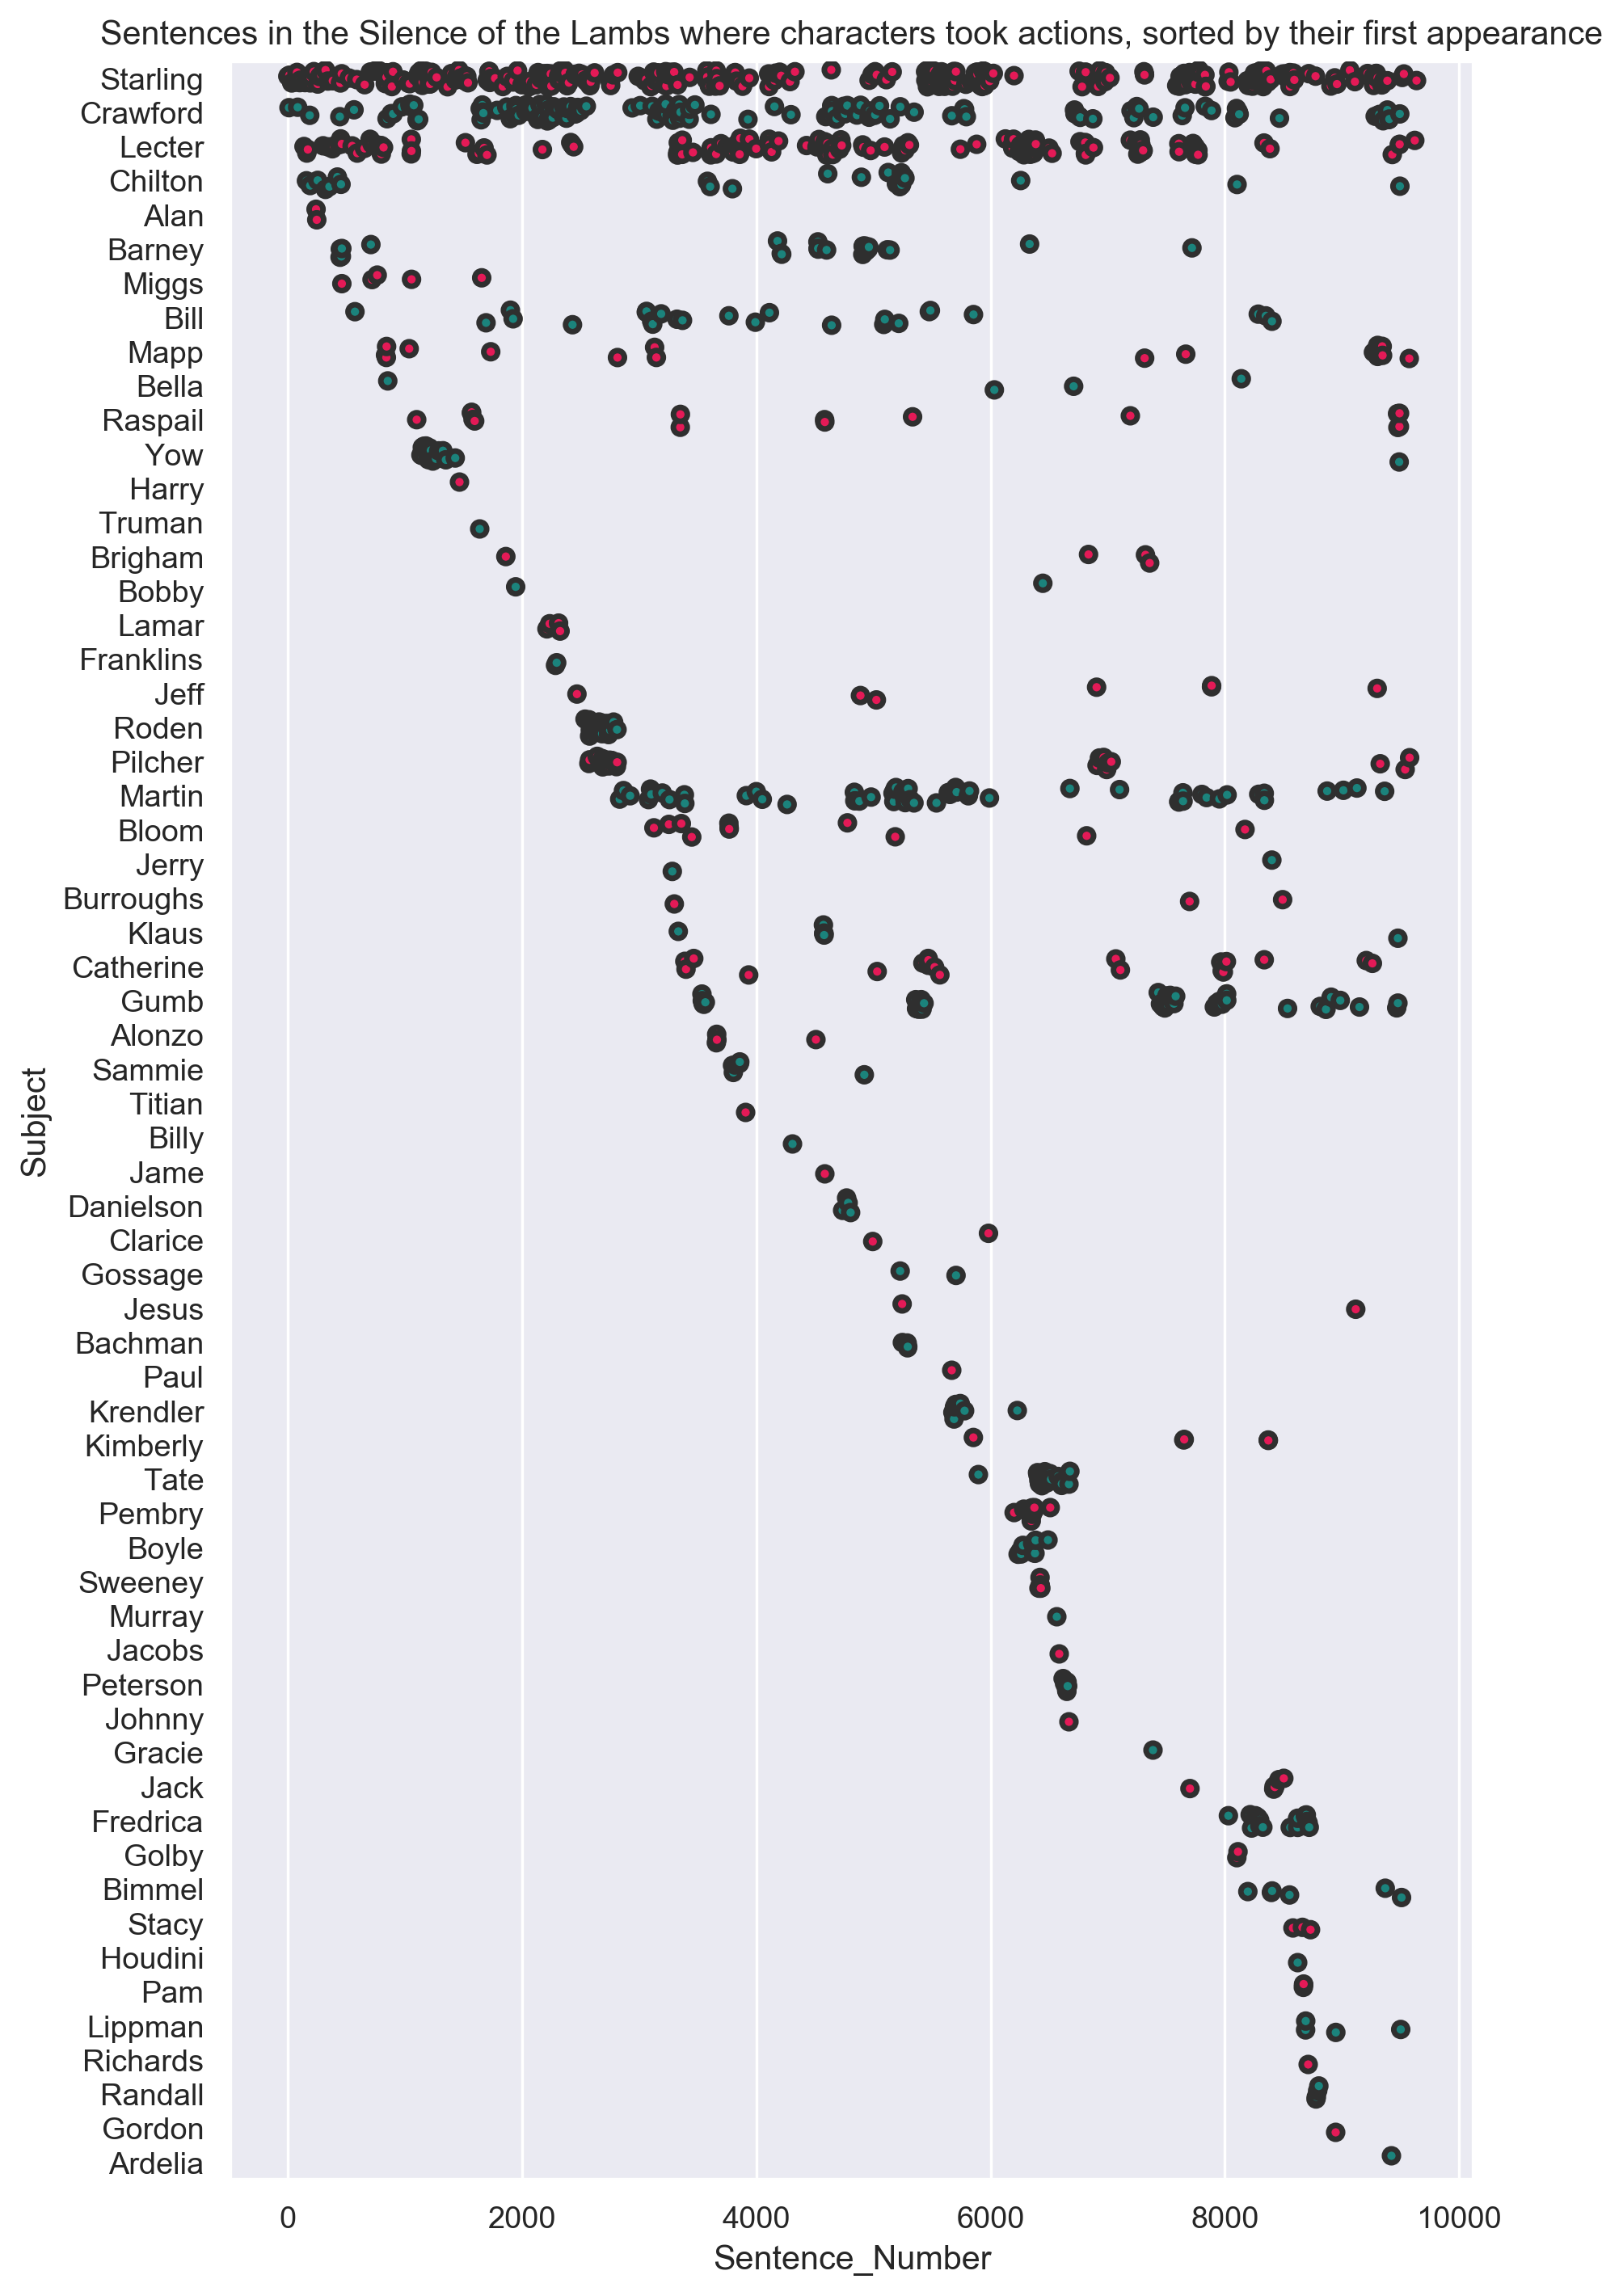

In [47]:
plt.action_plot(df_spans)

In [48]:
#Extract most common verbs and plot for all the Major characters --- Decide the Number of Top Verbs to extract/visualize
most_common_verbs = plt.most_common(df_spans, 5)

In [49]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[0], 20, px.colors.cyclical.HSV)

In [51]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[1], 20, px.colors.sequential.thermal)

In [52]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[3], 20, px.colors.sequential.Magenta)

In [53]:
#Plot most common/top verbs used by specific characters
plt.xter_verbs_plot(df_spans, characters[4], 20, px.colors.diverging.PRGn)

### Summary:


- Spacy's NER (Named Entity Recognition) is not quite optimized for Entity extraction from Novels, as you observed there were a lot misclassification of entities that we had to use another technique to deal with, but still there were these error in classification still persisted.


- The next step will be to look at the sentences where specific characters were mentioned and perform various analyses on them such as Sentiment analysis, document similarity between different characters to compare and contrast, etc.,


- Also, these analyses could be useful for film adaptation, in the sense that it gives a screen writer a sense of the major characters (including the unamed narrator) that are needed for the movie if the novel is to be adapted.